## 범죄 데이터 

In [2]:
import pandas as pd

In [3]:
df = pd.read_hdf('../data/crime.h5')

In [4]:
df.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


#### info() 를 통해 알 수 있는 점
- GEO_LON, GEO_LAT 에 결측치가 있다.
- 위/경도 데이터는 신고전화는 받았는데 위치를 모를 수 도 있기 때문에 null 값이 들어있다 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 460911 entries, 0 to 460910
Data columns (total 8 columns):
OFFENSE_TYPE_ID        460911 non-null category
OFFENSE_CATEGORY_ID    460911 non-null category
REPORTED_DATE          460911 non-null datetime64[ns]
GEO_LON                457296 non-null float64
GEO_LAT                457296 non-null float64
NEIGHBORHOOD_ID        460911 non-null category
IS_CRIME               460911 non-null int64
IS_TRAFFIC             460911 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(2)
memory usage: 22.9 MB


In [5]:
df.describe()
# 이 데이터로는 통계적으로 별로 안중요함 

,GEO_LON,GEO_LAT,IS_CRIME,IS_TRAFFIC
count,457296.000000,457296.000000,460911.000000,460911.000000
mean,-104.949973,39.726061,0.728668,0.271855
std,1.243537,0.471636,0.444648,0.444916
min,-105.300593,0.000001,0.000000,0.000000
25%,-105.009524,39.706890,0.000000,0.000000
50%,-104.982722,39.739285,1.000000,0.000000
75%,-104.929727,39.757689,1.000000,1.000000
max,-0.000002,39.904311,1.000000,1.000000


In [5]:
# type 이 category 인것의 특징
df.describe(include='category')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,NEIGHBORHOOD_ID
count,460911,460911,460911
unique,196,15,78
top,traffic-accident,traffic-accident,five-points
freq,87420,125060,23466


In [16]:
df.tail()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
460906,burglary-business-by-force,burglary,2017-09-13 05:48:00,-105.033840,39.762365,west-highland,1,0
460907,weapon-unlawful-discharge-of,all-other-crimes,2017-09-12 20:37:00,-105.040313,39.721264,barnum-west,1,0
460908,traf-habitual-offender,all-other-crimes,2017-09-12 16:32:00,-104.847024,39.779596,montbello,1,0
460909,criminal-mischief-other,public-disorder,2017-09-12 13:04:00,-104.949183,39.756353,skyland,1,0
460910,theft-other,larceny,2017-09-12 09:30:00,-104.985739,39.735045,capitol-hill,1,0


In [8]:
df.sample(3)

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
8679,theft-of-motor-vehicle,auto-theft,2014-01-25 16:56:00,-104.895340,39.783977,stapleton,1,0
171737,drug-heroin-possess,drug-alcohol,2015-09-29 15:12:00,-104.998855,39.740117,lincoln-park,1,0
5280,public-order-crimes-other,all-other-crimes,2014-07-31 19:07:00,-105.053261,39.725654,barnum-west,1,0


In [17]:
df.groupby('OFFENSE_CATEGORY_ID').count().head()

,OFFENSE_TYPE_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
OFFENSE_CATEGORY_ID,,,,,,,
aggravated-assault,10961,10961,10961,10961,10961,10961,10961
all-other-crimes,72343,72343,72343,72343,72343,72343,72343
arson,602,602,602,602,602,602,602
auto-theft,23453,23453,23453,23453,23453,23453,23453
burglary,26606,26606,26606,26606,26606,26606,26606


In [21]:
# dt :  datetime 으로 바꿔서 추가적인 기능사용함 
df.REPORTED_DATE.dt.weekday_name.sample(10)

224858     Saturday
296113       Sunday
432981       Monday
460331    Wednesday
343673       Friday
256136    Wednesday
262734    Wednesday
316480      Tuesday
234199       Sunday
19207        Monday
Name: REPORTED_DATE, dtype: object

---

### 시계열 데이터 분석을 하기위해 REPORTED_DATE 을 Index로 설정

In [6]:
crime = df.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [7]:
crime.sort_index(inplace=True)

In [8]:
crime

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [34]:
crime['2012-01-01':'2012-01-03']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [36]:
crime['2012-01-01':'2012-01-03']['IS_CRIME'].value_counts()

1    98
0    71
Name: IS_CRIME, dtype: int64

In [38]:
a = crime['2012-01-01':'2012-01-03']['IS_CRIME'].value_counts()[0]
b = crime['2012-01-01':'2012-01-03']['IS_CRIME'].value_counts()[1]
a / (a+b)

0.42011834319526625

In [39]:
crime.loc['2015-12'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-12-01 00:48:00,theft-of-motor-vehicle,auto-theft,-104.891681,39.740155,east-colfax,1,0
2015-12-01 00:48:00,drug-cocaine-possess,drug-alcohol,-104.891681,39.740155,east-colfax,1,0
2015-12-01 01:00:00,criminal-mischief-other,public-disorder,-104.993574,39.739773,civic-center,1,0
2015-12-01 01:10:00,traf-other,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:10:00,traf-habitual-offender,all-other-crimes,-104.995496,39.725618,baker,1,0
2015-12-01 01:27:00,traf-other,all-other-crimes,-104.959699,39.745851,city-park,1,0
2015-12-01 01:44:00,extortion,all-other-crimes,-105.041735,39.720193,barnum-west,1,0
2015-12-01 01:44:00,weapon-carrying-concealed,all-other-crimes,-104.986891,39.756010,five-points,1,0
2015-12-01 01:44:00,weapon-carrying-prohibited,all-other-crimes,-104.986891,39.756010,five-points,1,0


In [41]:
crime.loc['2015-12'].groupby('OFFENSE_CATEGORY_ID').count()

,OFFENSE_TYPE_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
OFFENSE_CATEGORY_ID,,,,,,
aggravated-assault,140,140,140,140,140,140
all-other-crimes,1151,1151,1151,1151,1151,1151
arson,5,5,5,5,5,5
auto-theft,408,408,408,408,408,408
burglary,487,487,487,487,487,487
drug-alcohol,367,367,367,367,367,367
larceny,675,675,675,675,675,675
murder,2,2,2,2,2,2
other-crimes-against-persons,315,315,315,315,315,315


In [16]:
# 2시부터 5시까지
crime.between_time('2:00','5:00' , include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0
2012-01-03 04:18:00,burglary-business-by-force,burglary,-104.941613,39.783624,elyria-swansea,1,0


In [43]:
crime.at_time('5:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-15 05:47:00,burglary-business-by-force,burglary,-104.967844,39.678296,university,1,0
2012-05-26 05:47:00,assault-simple,other-crimes-against-persons,-104.991880,39.753646,five-points,1,0
2012-06-10 05:47:00,aggravated-assault,aggravated-assault,-105.020598,39.676478,college-view-south-platte,1,0
2012-07-04 05:47:00,sex-aslt-rape,sexual-assault,NaN,NaN,west-highland,1,0
2012-07-09 05:47:00,theft-of-motor-vehicle,auto-theft,-105.030215,39.708802,westwood,1,0


In [45]:
# 처음 5일 동안의 범죄 정보
crime.first('5D')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


---

## Resample
- important
- 날짜 별로 그래프
- 그래프로 그리면 시계열 그래프가 됨 

In [46]:
crime.resample('W')

DatetimeIndexResampler [freq=<Week: weekday=6>, axis=0, closed=right, label=right, convention=start, base=0]

In [47]:
weekly_crimes = crime.resample('W').size()

In [53]:
weekly_crimes.head()

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [55]:
daily_crime = crime.resample('D').size()
daily_crime.head()

REPORTED_DATE
2012-01-02     62
2012-01-03    107
2012-01-04    149
2012-01-05    144
2012-01-06    143
Freq: D, dtype: int64

In [56]:
import matplotlib.pyplot as plt

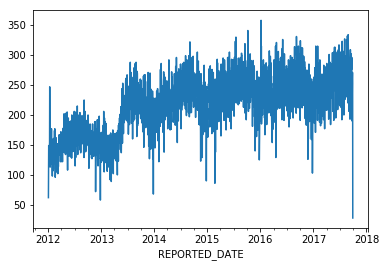

In [62]:
daily_crime.plot()

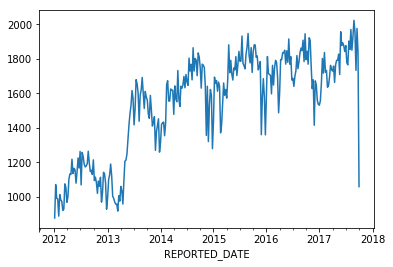

In [63]:
weekly_crimes.plot()

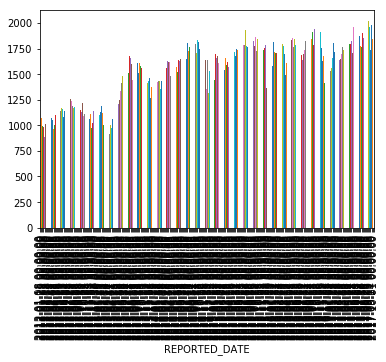

In [64]:
weekly_crimes.plot(kind='bar')

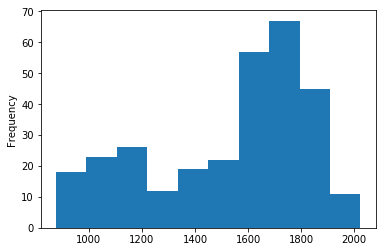

In [66]:
weekly_crimes.plot(kind='hist')

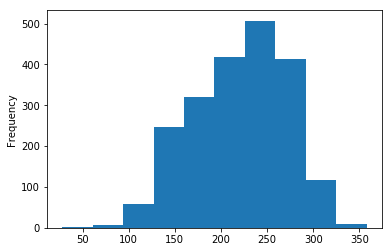

In [67]:
daily_crime.plot(kind='hist')